In [1]:
import os
import sys
import pprint

base_dir = 'C:\Documents\Thesis_ssd\MasterThesis-2.0'
os.chdir(base_dir)

from Classes.DataProcessing.LoadData import LoadData
from Classes.DataProcessing.BaselineHelperFunctions import BaselineHelperFunctions
from Classes.DataProcessing.DataHandler import DataHandler
from Classes.DataProcessing.DataGenerator import DataGenerator
from Classes.Modeling.Models import Models
from Classes.Modeling.RandomGridSearch import RandomGridSearch
from Classes.Modeling.CustomCallback import CustomCallback
from Classes.Scaling.ScalerFitter import ScalerFitter
from Classes.Scaling.MinMaxScalerFitter import MinMaxScalerFitter
from Classes.Scaling.StandardScalerFitter import StandardScalerFitter
import json

helper = BaselineHelperFunctions()
%load_ext tensorboard

In [2]:
num_classes = 3
loadData = LoadData(num_classes, isBalanced = True)
shuffle = False
full_ds, train_ds, val_ds, test_ds = loadData.getDatasets(shuffle = shuffle)
handler = DataHandler()
pp = pprint.PrettyPrinter(indent=4)
helper = BaselineHelperFunctions()

In [3]:
hyper_grid = {
        "batch_size" : [8, 16, 32, 64, 128, 256, 512],
        "epochs" : [30, 35, 40],
        "learning_rate" : [0.1, 0.01, 0.001, 0.0001, 0.00001],
        "optimizer" : ["adam", "rmsprop", "sgd"]
    }
model_grid = {
    "start_neurons" : [8,16, 32, 64, 128, 256, 512, 1024],
    "dropout_rate" : [0.5, 0.4, 0.3, 0.2, 0.1, 0.01, 0],
    "filters" : [11, 13, 15, 17, 19, 21, 23, 25],
    "kernel_size" : [3, 5, 7, 9, 11, 13],
    "padding" : ["same"],
    "l2_r" : [0.3, 0.2, 0.1, 0.01, 0.001, 0.0001],
    "l1_r" : [0.3, 0.2, 0.1, 0.01, 0.001, 0.0001],
    "activation" : ["relu", "sigmoid", "softmax", "tanh"],
    "output_layer_activation" : ["softmax", "sigmoid"]
}


model_nr = 8

test_mode = False
use_scaler = True
use_noise_augmentor = True
detrend = False
use_minmax = False

n_picks = 30

use_tensorboard = False
use_liveplots = True
use_custom_callback = False
use_early_stopping = True

randomGridSearch = RandomGridSearch(train_ds, val_ds, test_ds, model_nr, test_mode, detrend,
                                    use_scaler, use_noise_augmentor, use_minmax, n_picks, 
                                    hyper_grid = hyper_grid, model_grid = model_grid, 
                                    num_classes = num_classes, use_tensorboard = use_tensorboard,
                                    use_liveplots = use_liveplots, use_custom_callback = use_custom_callback,
                                    use_early_stopping = use_early_stopping)

In [4]:
def clear_tensorboard_dir():
    import os
    import shutil
    path = f"{base_dir}/Tensorboard_dir/fit"
    files = os.listdir(path)
    print(files)
    for f in files:
        shutil.rmtree(os.path.join(path,f))
if use_tensorboard:
    clear_tensorboard_dir()
    %tensorboard --logdir tensorboard_dir/fit

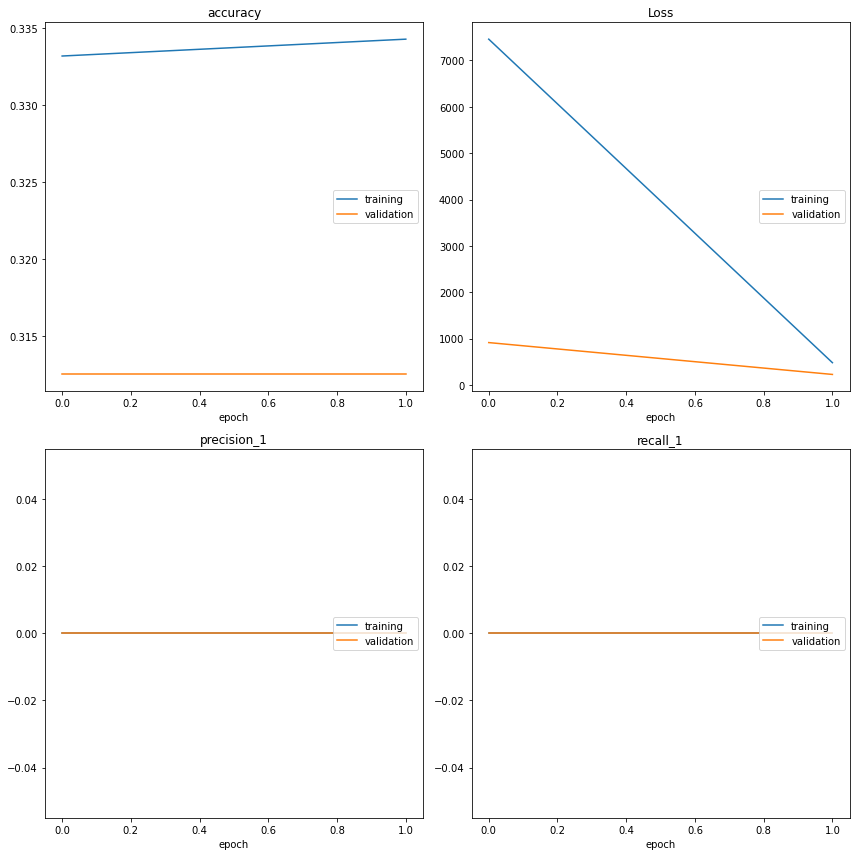

accuracy
	training         	 (min:    0.333, max:    0.334, cur:    0.334)
	validation       	 (min:    0.312, max:    0.312, cur:    0.312)
Loss
	training         	 (min:  478.468, max: 7460.190, cur:  478.468)
	validation       	 (min:  224.824, max:  912.255, cur:  224.824)
precision_1
	training         	 (min:    0.000, max:    0.000, cur:    0.000)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
recall_1
	training         	 (min:    0.000, max:    0.000, cur:    0.000)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
257/256 [==============================] - 108s 420ms/step - loss: 478.4680 - accuracy: 0.3343 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 224.8239 - val_accuracy: 0.3125 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/30
178/256 [===================>..........] - ETA: 30s - loss: 159.9015 - accuracy: 0.3303 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00

In [ ]:
results, highest_test_accuracy_index, highest_train_accuracy_index, highest_test_precision_index, highest_test_recall_index= randomGridSearch.fit()

In [ ]:
dictionaries = randomGridSearch.read_results()
print(dictionaries)
use_tensorboard = True

**Highest test accuracy**

In [ ]:
model_test_accuracy = randomGridSearch.fit_from_result(dictionaries, highest_test_accuracy_index, use_tensorboard = use_tensorboard)

**Highest train accuracy**

In [ ]:
model_train_accuracy = randomGridSearch.fit_from_result(dictionaries, highest_train_accuracy_index, use_tensorboard = use_tensorboard)

**Highest precision**

In [ ]:
model_test_precision = randomGridSearch.fit_from_result(dictionaries, highest_test_precision_index, use_tensorboard = use_tensorboard)

**Highest recall**

In [ ]:
model_test_recall = randomGridSearch.fit_from_result(dictionaries, highest_test_recall_index, use_tensorboard = use_tensorboard)